In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("/content/imdb_data.csv")

In [85]:
#Lets check whether the data is load or not. check first 5 rows

In [86]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [87]:
#basic information about dataset.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


- The dataset contain 3348 rows and 12 columns

- There are 6 object data type . 4 integer columns, 2 float columns.

- isAdult column showing int. we need to convert this columns into Yes and No format to analyse the data properly.

- release_date column is an object , which should be converted to date time format or  we seperate the date, year and month for better analysis.

In [89]:
#lets check for the missing values.


In [90]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


- gross (51 missing values )

- gross represent total earning of a movies. missing values may indicate that data was unavailable or the movie is underperformed.

-possible solution - 1 -missing values replace with mean or median

2 - drop rows with missing values - 51 rows will be droped from the dataset

3 - If budget is available . then we estimate the gross using a median.


- missing release dates - incomplete record.
- possible solution rop the rows.

In [91]:
#lets replace the missing values of gross with KNN imputation

In [92]:
from sklearn.impute import KNNImputer

In [93]:
imputer = KNNImputer(n_neighbors=5)

In [94]:
df[['budget', 'gross']] = imputer.fit_transform(df[['budget', 'gross']])

In [95]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [96]:
#drop release date rows

In [97]:
df = df.dropna(subset=['release_date'])

In [98]:
df.shape

(3343, 12)

- After successfully removing the null values we have clean dataset.

- total 3343 rows and 12 columns.

- so lets start to do EDA

In [99]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [100]:
#lets find out  How many unique movies are in the dataset?

In [101]:
df['id'].nunique()

3343

so we have 3343 unique movies. so that mean we dont have any duplicated values in the dataset.

In [102]:
#lets check the overall distribution of movie runtime.

Text(0.5, 1.0, 'Distribution of Movie Runtime')

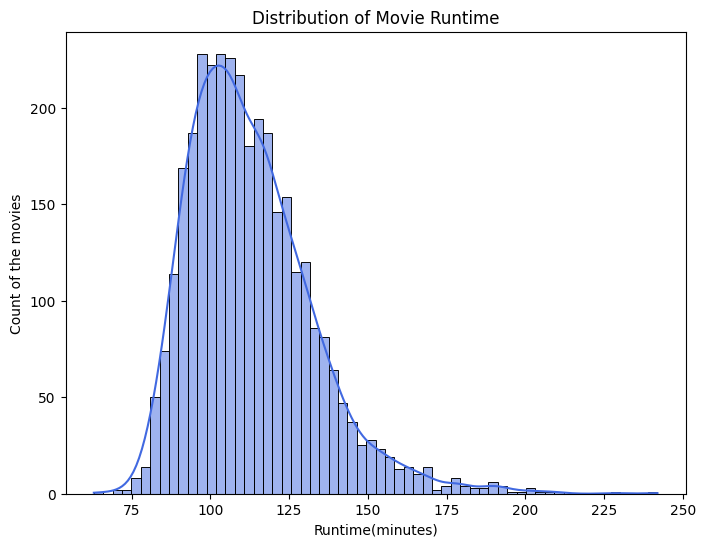

In [103]:
plt.figure(figsize=(8,6))
sns.histplot(df['runtimeMinutes'], bins=60, kde=True, color='royalblue')
plt.xlabel("Runtime(minutes)")
plt.ylabel("Count of the movies")
plt.title("Distribution of Movie Runtime")

In [104]:
#as we see the distribution. it seems like normal distribution. but lets check for the outliers also

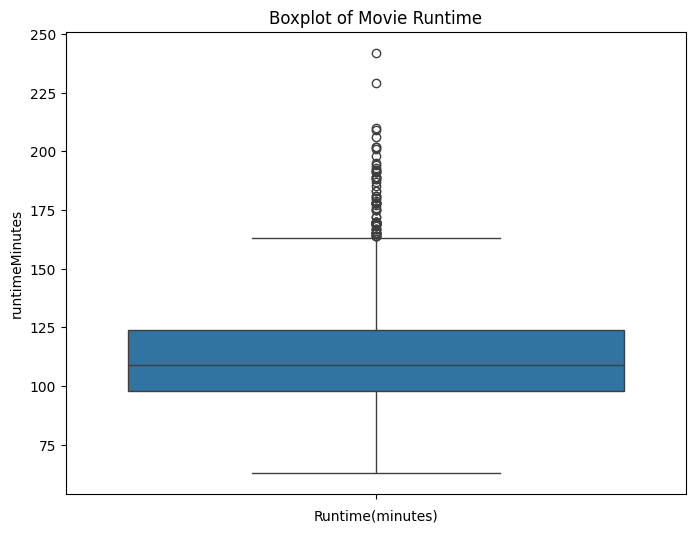

In [105]:
plt.figure(figsize=(8,6))
sns.boxplot(df['runtimeMinutes'])
plt.xlabel("Runtime(minutes)")
plt.title("Boxplot of Movie Runtime")
plt.savefig("Runtime.png", dpi=300)

In [106]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?

In [107]:
df['isAdult'].unique()

array([0])

- as weseen we have only one category in adult section.

- that mean all movies is only for Adult

- so for better analysis we drop the adult column

In [108]:
df.drop(columns=['isAdult'], inplace=True)

In [109]:
#What are the top 10 most common movie genres?

In [110]:
df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [111]:
genres_list = df['genres'].str.split(",").explode()

In [112]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [113]:
genres_counts = genres_list.value_counts().head(10)

In [114]:
genres_counts

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


<ipython-input-115-4d1000c1601d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')


Text(0, 0.5, 'Number of movies')

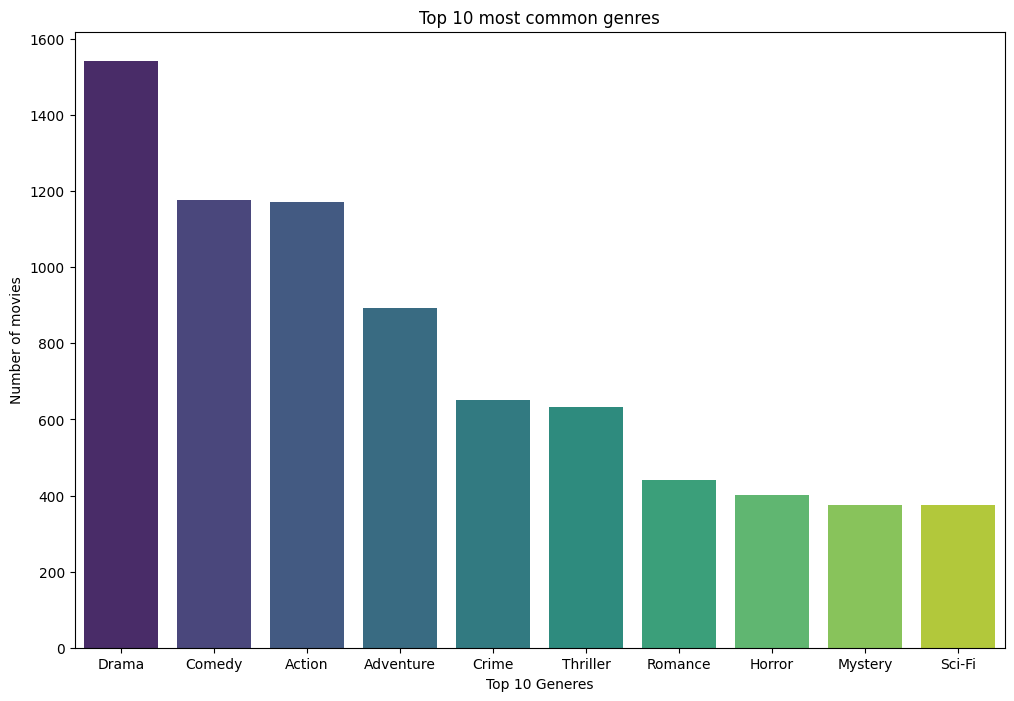

In [115]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')
plt.title("Top 10 most common genres")
plt.xlabel("Top 10 Generes")
plt.ylabel("Number of movies")

- Drama is the most dminant genre with 1542 movies

-comedy and action are almost eqal ~ 1170

- Adventure , crime and thriller are strong contenders -

-romance , horror, mystery an si-fi are mid tier genres.

In [116]:
#What is the distribution of averageRating? Are ratings skewed toward high or low values?


In [117]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of average rating')

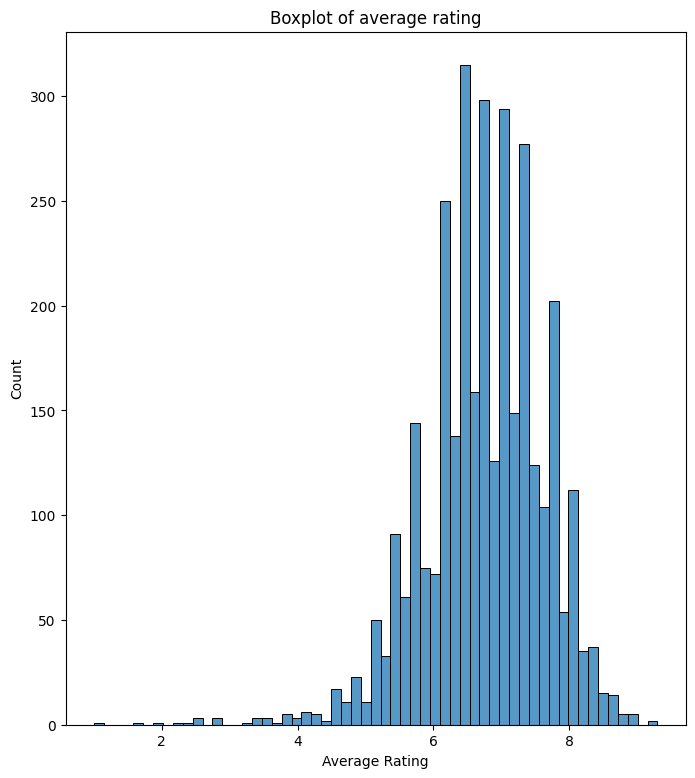

In [118]:
plt.figure(figsize=(8,9))
sns.histplot(x=df['averageRating'])
plt.xlabel("Average Rating")
plt.title("Boxplot of average rating")


- Most movies are well rated

- The majority of rating are above 6  to 8 indicating positive bias in user reviews.

-some movies are high rated movies. looks like outliers.

-there are fewer low rated movies, looks outlier, meaning people dontbother to rate them. low rated movies. - prabalely disliked by audiences.

In [119]:
##lets see how many movies are very low and very high rated

Text(0.5, 1.0, 'Boxplot of average rating')

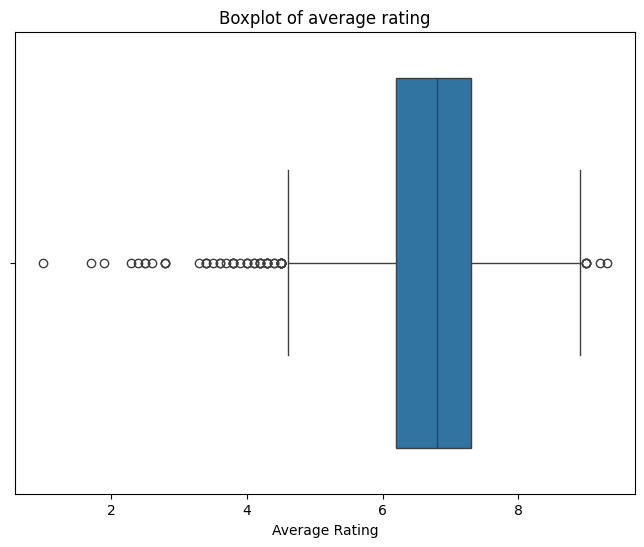

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['averageRating'])
plt.xlabel("Average Rating")
plt.title("Boxplot of average rating")


- Most movies are well rated

- The majority of rating are above 6  to 8 indicating positive bias in user reviews.

-some movies are high rated movies. looks like outliers.

-there are fewer low rated movies, looks outlier, meaning people dontbother to rate them. low rated movies. - prabalely disliked by audiences.


In [121]:
# there is outlier we can find outlier

In [122]:
df.groupby('averageRating').describe()

runtimeMinutes                                                  \
                       count   mean        std    min     25%    50%     75%   
averageRating                                                                  
1.0                      1.0  108.0        NaN  108.0  108.00  108.0  108.00   
1.7                      1.0  105.0        NaN  105.0  105.00  105.0  105.00   
1.9                      1.0   87.0        NaN   87.0   87.00   87.0   87.00   
2.3                      1.0   94.0        NaN   94.0   94.00   94.0   94.00   
2.4                      1.0   86.0        NaN   86.0   86.00   86.0   86.00   
...                      ...    ...        ...    ...     ...    ...     ...   
8.8                      5.0  157.2  19.715476  139.0  142.00  148.0  178.00   
8.9                      1.0  154.0        NaN  154.0  154.00  154.0  154.00   
9.0                      4.0  187.5  23.867691  152.0  184.25  198.0  201.25   
9.2                      1.0  175.0        NaN  175.0  175.00  175.0  175.00   
9.3                      1.0  142.0        NaN  142.0  142.00  142.0  142.00   

                     numVotes              ...       budget               \
                 max    count        mean  ...          75%          max   
averageRating                              ...                             
1.0            108.0      1.0    73940.00  ...    8000000.0    8000000.0   
1.7            105.0      1.0    76394.00  ...   13000000.0   13000000.0   
1.9             87.0      1.0    93840.00  ...   20000000.0   20000000.0   
2.3             94.0      1.0    58583.00  ...   84000000.0   84000000.0   
2.4             86.0      1.0   108506.00  ...   20000000.0   20000000.0   
...              ...      ...         ...  ...          ...          ...   
8.8            179.0      5.0  2125319.20  ...   94000000.0  160000000.0   
8.9            154.0      1.0  2160463.00  ...    8000000.0    8000000.0   
9.0            202.0      4.0  1869328.25  ...  116750000.0  185000000.0   
9.2            175.0      1.0  1963432.00  ...    6000000.0    6000000.0   
9.3            142.0      1.0  2817283.00  ...   25000000.0   25000000.0   

              gross                                                        \
              count          mean           std          min          25%   
averageRating                                                               
1.0             1.0  5.385510e+05           NaN     538551.0     538551.0   
1.7             1.0  9.903683e+07           NaN   99036827.0   99036827.0   
1.9             1.0  3.481682e+07           NaN   34816824.0   34816824.0   
2.3             1.0  5.998155e+07           NaN   59981548.0   59981548.0   
2.4             1.0  8.723816e+07           NaN   87238158.0   87238158.0   
...             ...           ...           ...          ...          ...   
8.8             5.0  6.931449e+08  3.461932e+08  101209702.0  678226465.0   
8.9             1.0  2.139288e+08           NaN  213928762.0  213928762.0   
9.0             4.0  6.332638e+08  5.329552e+08   47961919.0  253611413.5   
9.2             1.0  2.503418e+08           NaN  250341816.0  250341816.0   
9.3             1.0  2.888472e+07           NaN   28884716.0   28884716.0   

                                                        
                       50%           75%           max  
averageRating                                           
1.0               538551.0  5.385510e+05  5.385510e+05  
1.7             99036827.0  9.903683e+07  9.903683e+07  
1.9             34816824.0  3.481682e+07  3.481682e+07  
2.3             59981548.0  5.998155e+07  5.998155e+07  
2.4             87238158.0  8.723816e+07  8.723816e+07  
...                    ...           ...           ...  
8.8            839030630.0  8.985237e+08  9.487342e+08  
8.9            213928762.0  2.139288e+08  2.139288e+08  
9.0            664749091.0  1.044401e+09  1.155595e+09  
9.2            250341816.0  2.503418e+08  2.503418e+08  
9.3     

In [123]:
Q1 = df['averageRating'].quantile(0.25)
Q3 = df['averageRating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['averageRating'] <lower_bound) | (df['averageRating'] > upper_bound)]

In [124]:
Q1


np.float64(6.2)

In [125]:
Q3

np.float64(7.3)

In [126]:

IQR

np.float64(1.0999999999999996)

In [127]:
lower_bound



np.float64(4.550000000000001)

In [128]:
upper_bound

np.float64(8.95)

In [129]:
outliers

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
17,tt0068646,The Godfather,The Godfather,175,"Crime,Drama",9.2,1963432,6000000.0,2.503418e+08,"March 14, 1972",Francis Ford Coppola
38,tt0071562,The Godfather Part II,The Godfather Part II,202,"Crime,Drama",9.0,1333027,13000000.0,4.796192e+07,"December 12, 1974",Francis Ford Coppola
275,tt0094074,Superman IV: The Quest for Peace,Superman IV: The Quest for Peace,90,"Action,Adventure,Sci-Fi",3.7,51681,17000000.0,3.028102e+07,"July 23, 1987",Sidney J. Furie
486,tt0107978,RoboCop 3,RoboCop 3,104,"Action,Crime,Sci-Fi",4.1,53005,22000000.0,1.069621e+07,"May 1, 1993",Fred Dekker
488,tt0108052,Schindler's List,Schindler's List,195,"Biography,Drama,History",9.0,1416181,22000000.0,3.221612e+08,"November 30, 1993",Steven Spielberg
491,tt0108255,Super Mario Bros.,Super Mario Bros.,104,"Adventure,Comedy,Family",4.1,61782,48000000.0,2.091546e+07,"May 28, 1993","Annabel Jankel, Rocky Morton"
529,tt0111161,The Shawshank Redemption,The Shawshank Redemption,142,Drama,9.3,2817283,25000000.0,2.888472e+07,"September 10, 1994",Frank Darabont
534,tt0111301,Street Fighter,Street Fighter,102,"Action,Adventure,Comedy",4.0,74256,35000000.0,9.943179e+07,"December 23, 1994",Steven E. de Souza
661,tt0118688,Batman & Robin,Batman & Robin,125,"Action,Sci-Fi",3.8,264396,125000000.0,2.382540e+08,1997,Joel Schumacher
708,tt0119707,Mortal Kombat: Annihilation,Mortal Kombat: Annihilation,95,"Action,Adventure,Fantasy",3.6,57337,30000000.0,5.137686e+07,"November 21, 1997",John R. Leonetti


In [130]:
outliers.shape

(55, 11)

In [131]:
#How many movies have received over 100,000 votes (numVotes > 100,000)?

In [132]:
high_rated_movies=df[df['numVotes']>100000]

In [133]:
high_rated_movies.shape

(2099, 11)

Text(0.5, 1.0, 'Distribution of movies votes')

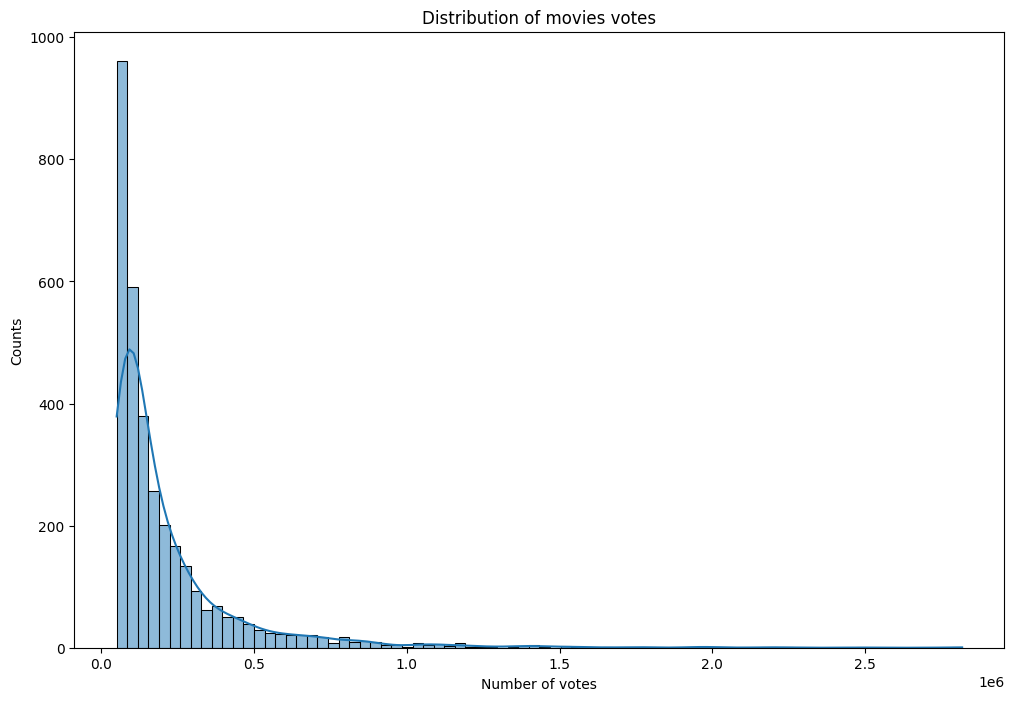

In [134]:
plt.figure(figsize=(12,8))
sns.histplot(df['numVotes'], bins = 80, kde= True)
plt.xlabel("Number of votes")
plt.ylabel("Counts")
plt.title("Distribution of movies votes")

In [135]:
##7. What is the distribution of movie budgets?

Text(0.5, 1.0, 'Distribution of Movies Budget')

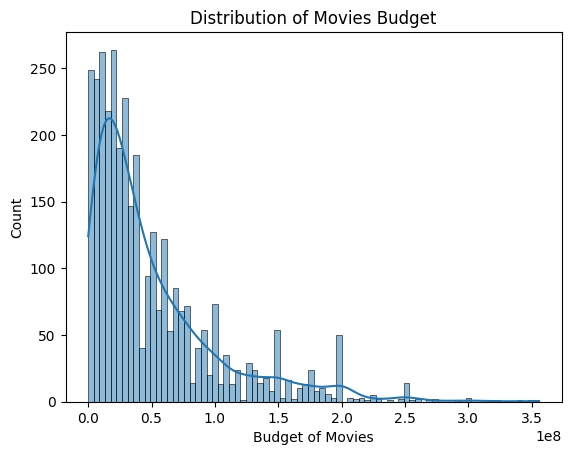

In [136]:
sns.histplot(df['budget'],bins=80,kde=True)
plt.xlabel("Budget of Movies")
plt.ylabel("Count")
plt.title("Distribution of Movies Budget")

- the budget distriution id right skewed

- many movies had low budget movies

- few movies only had high budgets


Text(0.5, 1.0, 'Boxplot of Movies Budget')

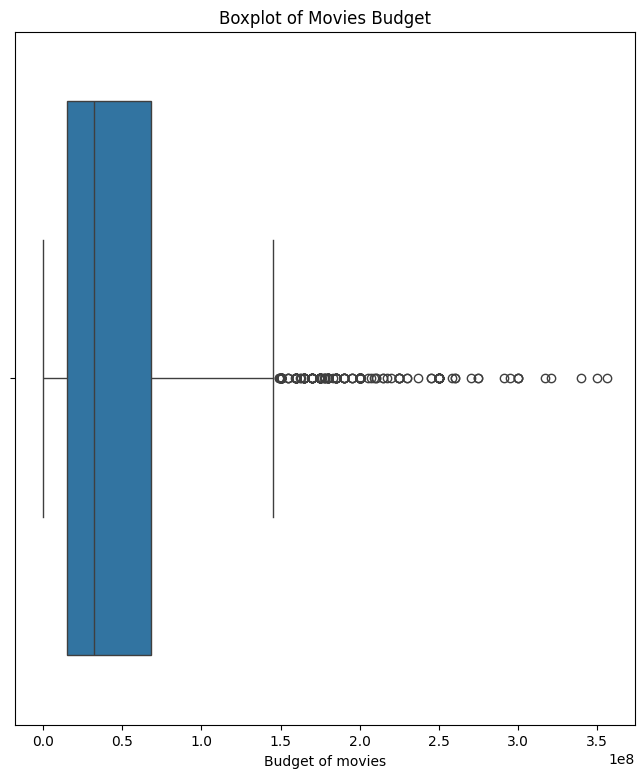

In [137]:
plt.figure(figsize=(8,9))
sns.boxplot(x=df['budget'])
plt.xlabel("Budget of movies")
plt.title("Boxplot of Movies Budget")


In [138]:
#here we can fiind outliers

In [139]:
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['budget'] <lower_bound) | (df['budget'] > upper_bound)]

In [140]:
outliers.shape

(248, 11)

In [141]:
Q1


np.float64(15000000.0)

In [142]:
Q3

np.float64(68000000.0)

In [143]:
IQR


np.float64(53000000.0)

In [144]:
lower_bound



np.float64(-64500000.0)

In [145]:

upper_bound

np.float64(147500000.0)

In [146]:
outliers

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
596,tt0114898,Waterworld,Waterworld,135,"Action,Adventure,Sci-Fi",6.3,206057,175000000.0,2.642182e+08,"July 28, 1995",Kevin Reynolds
721,tt0120179,Speed 2: Cruise Control,Speed 2: Cruise Control,121,"Action,Adventure,Crime",3.9,84801,160000000.0,1.645081e+08,1997,Jan de Bont
726,tt0120338,Titanic,Titanic,194,"Drama,Romance",7.9,1252486,200000000.0,2.264743e+09,"November 1, 1997",James Cameron
746,tt0120657,The 13th Warrior,The 13th Warrior,102,"Action,Adventure,History",6.6,130161,160000000.0,6.169890e+07,"August 13, 1999","John McTiernan, Michael Crichton"
788,tt0120891,Wild Wild West,Wild Wild West,106,"Action,Comedy,Sci-Fi",4.9,165536,170000000.0,2.221047e+08,"June 30, 1999",Barry Sonnenfeld
...,...,...,...,...,...,...,...,...,...,...,...
3331,tt9362722,Spider-Man: Across the Spider-Verse,Spider-Man: Across the Spider-Verse,140,"Action,Adventure,Animation",8.7,291041,150000000.0,6.905167e+08,"May 31, 2023","Kemp Powers, Joaquim Dos Santos, Justin K. Tho..."
3333,tt9376612,Shang-Chi and the Legend of the Ten Rings,Shang-Chi and the Legend of the Ten Rings,132,"Action,Adventure,Fantasy",7.4,419133,200000000.0,4.322433e+08,"August 16, 2021",Destin Daniel Cretton
3335,tt9419884,Doctor Strange in the Multiverse of Madness,Doctor Strange in the Multiverse of Madness,126,"Action,Adventure,Fantasy",6.9,458344,200000000.0,9.557758e+08,"May 2, 2022",Sam Raimi
3337,tt9603212,Mission: Impossible - Dead Reckoning Part One,Mission: Impossible - Dead Reckoning Part One,163,"Action,Adventure,Thriller",7.8,181176,291000000.0,5.675354e+08,"June 19, 2023",Christopher McQuarrie


In [147]:
# What is the distribution of gross revenue?

Text(0.5, 1.0, 'Distribution of Movies Gross Revenue')

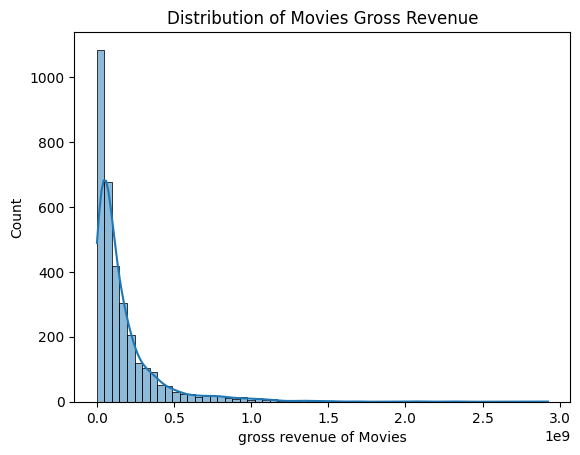

In [148]:
sns.histplot(df['gross'],kde=True,bins=60)
plt.xlabel("gross revenue of Movies")
plt.ylabel("Count")
plt.title("Distribution of Movies Gross Revenue")

Text(0.5, 1.0, 'Boxplot of Movies gross revenue')

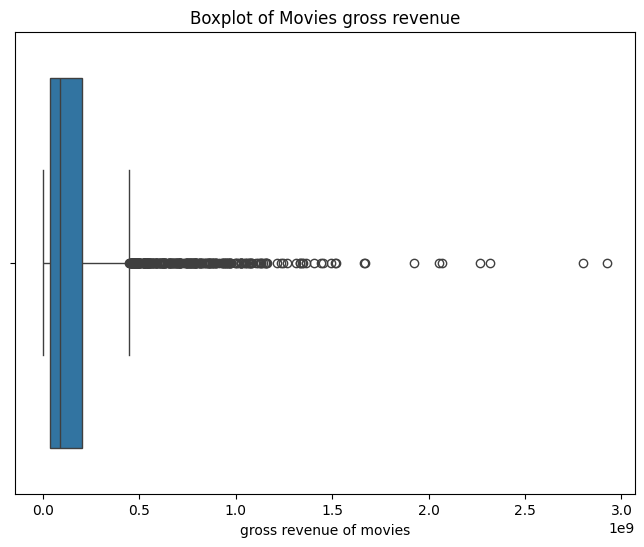

In [149]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['gross'])
plt.xlabel("gross revenue of movies")
plt.title("Boxplot of Movies gross revenue")

- gross revenue distribution is right skewed

- a few blockbuster movies earning massive amount

- there outliers movies with extream earnings.

In [150]:
#here we can find out outliers

In [151]:
Q1= df['gross'].quantile(0.25)
Q3 = df['gross'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['gross'] <lower_bound) | (df['gross'] > upper_bound)]

In [152]:
outliers.shape

(277, 11)

In [153]:
Q1

np.float64(36551245.5)

In [154]:
Q3

np.float64(200600067.5)

In [155]:
IQR

np.float64(164048822.0)

In [156]:
lower_bound

np.float64(-209521987.5)

In [157]:
upper_bound

np.float64(446673300.5)

In [158]:
outliers

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
44,tt0073195,Jaws,Jaws,124,"Adventure,Mystery,Thriller",8.1,644554,7000000.0,4.765121e+08,"June 20, 1975",Steven Spielberg
67,tt0076759,Star Wars: Episode IV - A New Hope,Star Wars,121,"Action,Adventure,Fantasy",8.6,1421081,11000000.0,7.753980e+08,"May 25, 1977",George Lucas
95,tt0080684,Star Wars: Episode V - The Empire Strikes Back,Star Wars: Episode V - The Empire Strikes Back,124,"Action,Adventure,Fantasy",8.7,1349868,18000000.0,5.383751e+08,"May 17, 1980",Irvin Kershner
124,tt0083866,E.T. the Extra-Terrestrial,E.T. the Extra-Terrestrial,115,"Adventure,Family,Sci-Fi",7.9,428935,10500000.0,7.929106e+08,"May 26, 1982",Steven Spielberg
150,tt0086190,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode VI - Return of the Jedi,131,"Action,Adventure,Fantasy",8.3,1099045,32500000.0,4.751062e+08,"May 23, 1983",Richard Marquand
...,...,...,...,...,...,...,...,...,...,...,...
3295,tt8041270,Jurassic World Dominion,Jurassic World Dominion,147,"Action,Adventure,Sci-Fi",5.6,194409,165000000.0,1.001978e+09,"May 23, 2022",Colin Trevorrow
3324,tt9114286,Black Panther: Wakanda Forever,Black Panther: Wakanda Forever,161,"Action,Adventure,Drama",6.7,289232,250000000.0,8.592088e+08,"November 9, 2022",Ryan Coogler
3331,tt9362722,Spider-Man: Across the Spider-Verse,Spider-Man: Across the Spider-Verse,140,"Action,Adventure,Animation",8.7,291041,150000000.0,6.905167e+08,"May 31, 2023","Kemp Powers, Joaquim Dos Santos, Justin K. Tho..."
3335,tt9419884,Doctor Strange in the Multiverse of Madness,Doctor Strange in the Multiverse of Madness,126,"Action,Adventure,Fantasy",6.9,458344,200000000.0,9.557758e+08,"May 2, 2022",Sam Raimi


In [159]:
#What is the average budget and gross revenue of movies?

In [160]:
avg_budget=df['budget'].mean()

In [161]:
avg_gross=df['gross'].mean()

In [162]:
avg_budget

np.float64(50425817.86299731)

In [163]:
avg_gross

np.float64(167729001.37349686)

<ipython-input-164-eed7090f9e85>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['avg_budget','avg_gross'],


<Axes: >

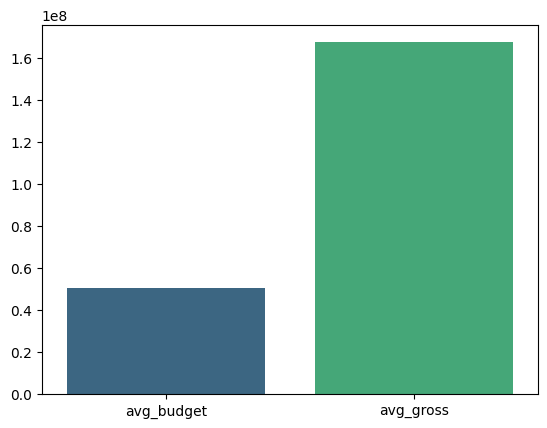

In [164]:
sns.barplot(x=['avg_budget','avg_gross'],
y=[avg_budget,avg_gross],palette='viridis')

In [165]:
 #Is there a signifcant correlaton between budget and gross revenue?

In [ ]:
correlation_matrix = df[['budget', 'gross']].corr() # Replace 'gross revenue' with 'gross'
# Calculate the correlation between 'budget' and 'gross' columns

# Print or display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


In [167]:

 correlation_matrix=df[['budget','gross']].corr()

<Axes: >

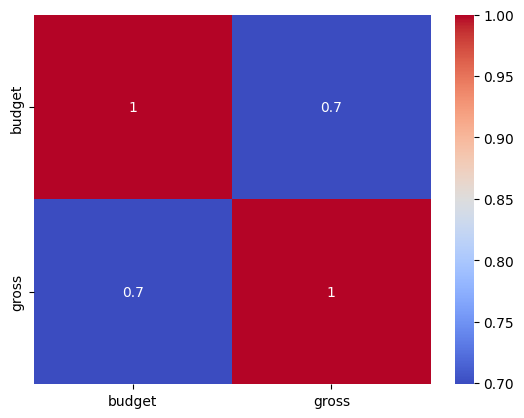

In [168]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

- strong positive corrlation ~ beetweeen budget and gross revenue
- this mean higher budget movies tends to greater higher revenues

In [169]:
#Do high-budget movies tend to have higher ratngs?

In [170]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [171]:
 correlation_matrix=df[['budget','averageRating']].corr()

In [173]:
 correlation_matrix

,budget,averageRating
budget,1.000000,-0.079107
averageRating,-0.079107,1.000000


Text(0.5, 1.0, 'Correlation between Budget and averageRating ')

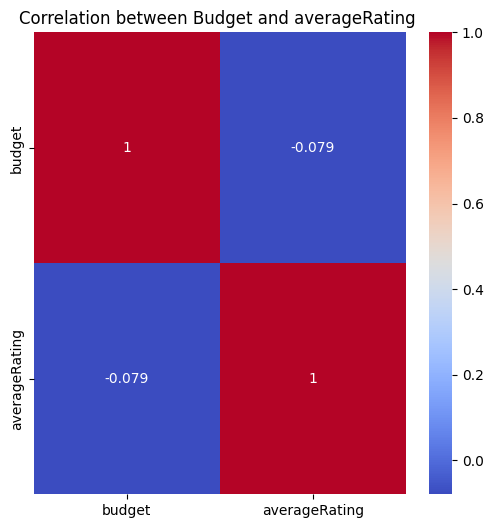

In [176]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Budget and averageRating ')


- weak negative correlation ~0.079
- sugggest almost no relationship between budget and average rating

In [177]:
 #Which are the top 10 highest-grossing movies?

In [186]:
top_grossing_movies=df[['primaryTitle','gross']].sort_values(by='gross',ascending=False).head(10)

In [187]:
top_grossing_movies

,primaryTitle,gross
1762,Avatar,2.923706e+09
3055,Avengers: Endgame,2.799439e+09
2514,Avatar: The Way of Water,2.320250e+09
726,Titanic,2.264743e+09
2850,Star Wars: Episode VII - The Force Awakens,2.071310e+09
3054,Avengers: Infinity War,2.052415e+09
2051,Spider-Man: No Way Home,1.921847e+09
1368,Jurassic World,1.671537e+09
3201,The Lion King,1.663075e+09
1859,The Avengers,1.520539e+09


<ipython-input-189-b7ac987ecb6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_grossing_movies['gross'],y=top_grossing_movies['primaryTitle'],palette='viridis')


<Axes: xlabel='gross', ylabel='primaryTitle'>

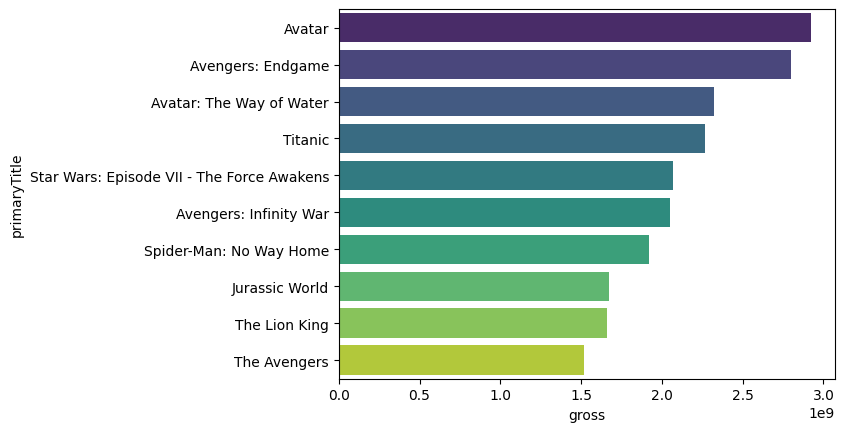

In [189]:
sns.barplot(x=top_grossing_movies['gross'],y=top_grossing_movies['primaryTitle'],palette='viridis')

In [190]:
 #Which are the top 10 most proftable movies (proft = gross - budget)?

In [191]:
df['profit']=df['gross']-df['budget']

In [194]:
top_profitable=df.sort_values(by='profit',ascending=False).head(10)

In [195]:
top_profitable

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
1762,tt0499549,Avatar,Avatar,162,"Action,Adventure,Fantasy",7.9,1364568,237000000.0,2.923706e+09,"December 10, 2009",James Cameron,2.686706e+09
3055,tt4154796,Avengers: Endgame,Avengers: Endgame,181,"Action,Adventure,Drama",8.4,1224453,356000000.0,2.799439e+09,"April 18, 2019","Anthony Russo, Joe Russo",2.443439e+09
726,tt0120338,Titanic,Titanic,194,"Drama,Romance",7.9,1252486,200000000.0,2.264743e+09,"November 1, 1997",James Cameron,2.064743e+09
2514,tt1630029,Avatar: The Way of Water,Avatar: The Way of Water,192,"Action,Adventure,Fantasy",7.6,466743,350000000.0,2.320250e+09,"December 6, 2022",James Cameron,1.970250e+09
2850,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,138,"Action,Adventure,Sci-Fi",7.8,960165,245000000.0,2.071310e+09,"December 14, 2015",J.J. Abrams,1.826310e+09
3054,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149,"Action,Adventure,Sci-Fi",8.4,1164767,321000000.0,2.052415e+09,"April 23, 2018","Anthony Russo, Joe Russo",1.731415e+09
2051,tt10872600,Spider-Man: No Way Home,Spider-Man: No Way Home,148,"Action,Adventure,Fantasy",8.2,841498,200000000.0,1.921847e+09,"December 13, 2021",Jon Watts,1.721847e+09
1368,tt0369610,Jurassic World,Jurassic World,124,"Action,Adventure,Sci-Fi",6.9,668305,150000000.0,1.671537e+09,"May 29, 2015",Colin Trevorrow,1.521537e+09
3201,tt6105098,The Lion King,The Lion King,118,"Adventure,Animation,Drama",6.8,260956,260000000.0,1.663075e+09,"July 9, 2019",Jon Favreau,1.403075e+09
2427,tt1517268,Barbie,Barbie,114,"Adventure,Comedy,Fantasy",7.0,376979,100000000.0,1.441660e+09,"July 9, 2023",Greta Gerwig,1.341660e+09


<ipython-input-198-81b5a9cfaba4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profitable['profit'],y=top_profitable['primaryTitle'],palette='viridis')


<Axes: xlabel='profit', ylabel='primaryTitle'>

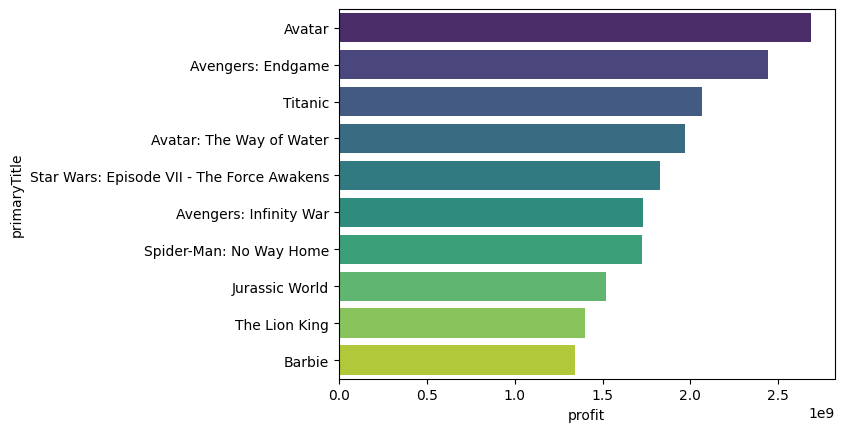

In [198]:
sns.barplot(x=top_profitable['profit'],y=top_profitable['primaryTitle'],palette='viridis')

In [199]:
correlation_matrix=df[['numVotes','profit']].corr()

In [200]:
correlation_matrix

,numVotes,profit
numVotes,1.000000,0.528258
profit,0.528258,1.000000


Text(0.5, 1.0, 'Correlation between numVotes and Profit ')

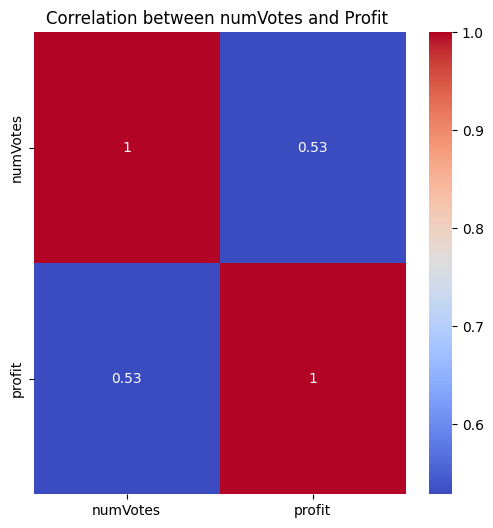

In [201]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between numVotes and Profit ')

- the correlation bet. number of votes and profit is 0.53 whicj indicates a moderate positive correlation